# Data transformation and feature engineering

This Jupyter Notebook demonstrates the data transformation and feature engineering steps of the data science workflow. The data transformation and feature engineering steps are the second step of the data science workflow:

1. Data collection, cleaning, formatting and storage
2. Data transformation and feature engineering     <--- We are here
3. Statistical modeling and machine learning
4. Visualization and presentation

In [2]:
# Importing libraries
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [3]:
# Reading the data
df = pd.read_csv('../data/processed_data/processed_data.csv')
# Dropping the ID column
df = df.drop('ID', axis = 1)
print(df.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  dpnm  
0         0         0       

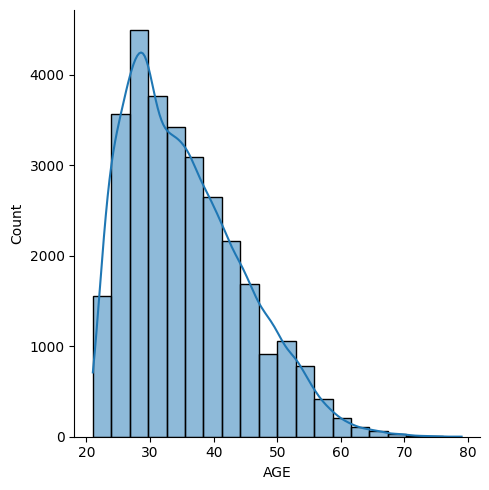

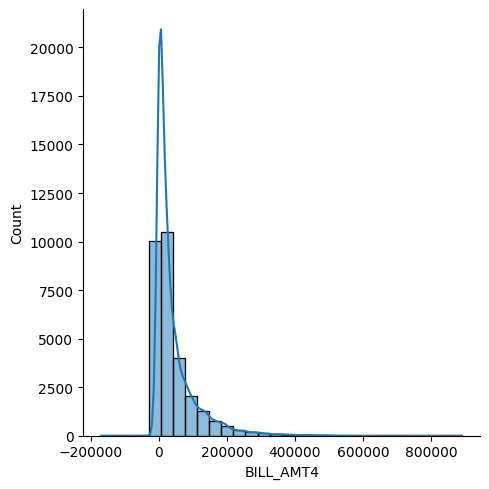

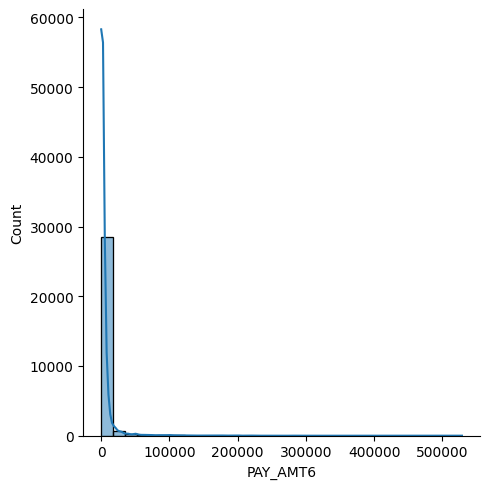

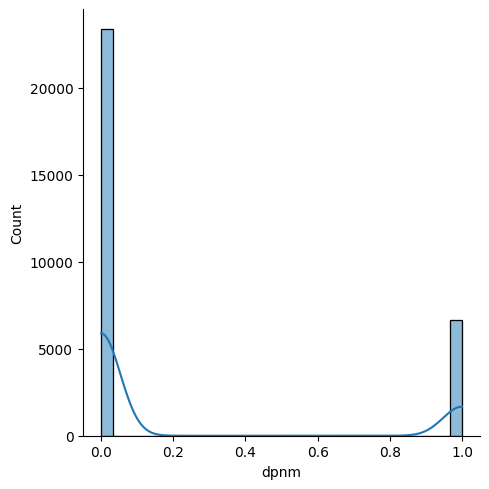

In [4]:
# Distribution plots are used to see if the data is normalized.

sns.displot(df['AGE'], bins = 20, kde = True)
sns.displot(df['BILL_AMT4'], bins = 30, kde = True)
sns.displot(df['PAY_AMT6'], bins = 30, kde = True)
sns.displot(df['dpnm'], bins = 30, kde = True)

In [25]:
# The data is not normalized. Scaling is required.

# Scaling the data
scaler = StandardScaler()
scaler.fit(df.drop('dpnm', axis = 1))
scaled_data = scaler.transform(df.drop('dpnm', axis = 1))
credit_feat = pd.DataFrame(scaled_data, columns = df.columns[:-1])
credit_feat.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [28]:
# saving the data

credit_feat.to_csv('../data/processed_data/processed_data_scaled.csv', index = False)